In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




In [ ]:

# Descrição do DataSet
# nome: Glass Identification ( Identificação de Vidro)
# Volume de dados: 213 amostras
# Descrição:

# O estudo da classificação dos tipos de vidro foi motivado pela investigação criminológica, pois fornece
# evidências  nessas investigações forenses
# Na cena do crime, o vidro deixado pode ser usado como prova se for corretamente identificado.
# O conjunto de dados é comumente usado para demonstrar algoritmos de classificação de aprendizado de máquina em ambientes acadêmicos.

# Objetivo

# O objetivo é prever com base na análise dos componentes quimicos
# em qual classe o tipo de vidro se encontra.
"""
Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""
# Colunas
#1 - ID
# 2 - Indice Refreativo 
#3 - Sodio
#4 - Magnesio
#5 - Aluminio
#6 -  Silicone
#7 - Potassio
#8 - Calcio
#9 - Barium
#10 - Ferro
#11 - Tipo


In [99]:
df = pd.read_csv('glass_data.csv')

df.columns = ["id", "indice_refrativo", "sodio", 'Magnesio', "Aluminio",
              "Silicone", "Potasio", "Calcio", "Barium", "Ferro", "tipo"]

#
# df['tipo'] = df['tipo'].apply(lambda x: (0, 1)[x <= 4])

#df_tipo = df['tipo']
# Campos nulos: Nenhum
# nulos = df.isna().sum()
# print("Campos nulos: ",nulos)

# tipos_colunas
#print("Tipos colunas: ",tipos_colunas)
#   df.dtypes

# Linha x Colunas
print(df.shape)

print(df.head(100))
#info:
print("Info: ",df.info( ))
# Descricao
describe = df.describe()
print(describe)

media_sodio = df.sodio.mean()
max_sodio = df.sodio.max()


# print("Dados estatisticos das colunas: ")
print(media_sodio)
print(max_sodio)



(213, 11)
     id  indice_refrativo  sodio  Magnesio  Aluminio  Silicone  Potasio  \
0     2           1.51761  13.89      3.60      1.36     72.73     0.48   
1     3           1.51618  13.53      3.55      1.54     72.99     0.39   
2     4           1.51766  13.21      3.69      1.29     72.61     0.57   
3     5           1.51742  13.27      3.62      1.24     73.08     0.55   
4     6           1.51596  12.79      3.61      1.62     72.97     0.64   
5     7           1.51743  13.30      3.60      1.14     73.09     0.58   
6     8           1.51756  13.15      3.61      1.05     73.24     0.57   
7     9           1.51918  14.04      3.58      1.37     72.08     0.56   
8    10           1.51755  13.00      3.60      1.36     72.99     0.57   
9    11           1.51571  12.72      3.46      1.56     73.20     0.67   
10   12           1.51763  12.80      3.66      1.27     73.01     0.60   
11   13           1.51589  12.88      3.43      1.40     73.28     0.69   
12   14        

In [103]:

media_sodio = df.sodio.mean()
max_sodio = df.sodio.max()


print("Dados estatisticos das colunas: ")
print("Media do sodio",media_sodio)
print("Max sodio",max_sodio)
print("tipo",df['tipo'].mean())

Dados estatisticos das colunas: 
Media do sodio 13.406760563380283
Max sodio 17.38
tipo 2.788732394366197


Text(0.5,1,'Count of Glass Types')

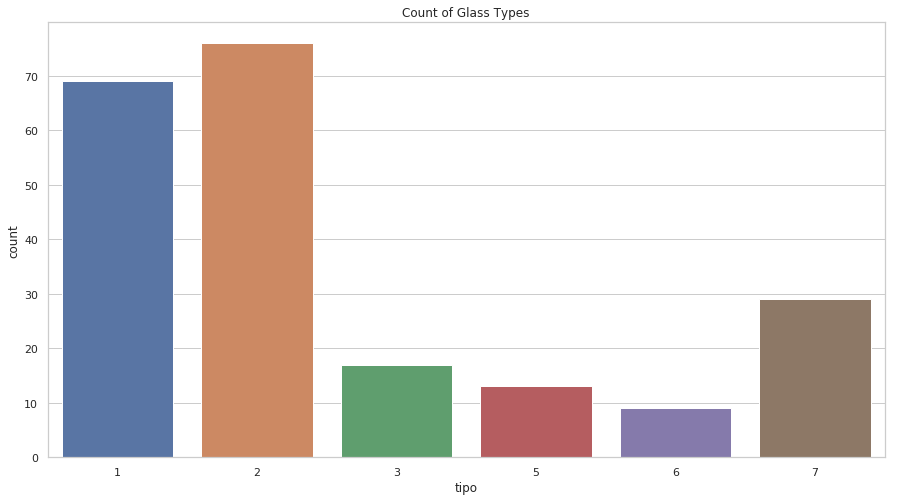

In [20]:
#sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
#df = pd.read_csv('glass_data.csv')
# ax = plt.plot(df['tipo'])
sns.countplot(x="tipo", data=df).set_title('Count of Glass Types')

In [75]:
grouBy = df.groupby('tipo',as_index=False).mean()

In [76]:
grouBy


,tipo,id,indice_refrativo,sodio,Magnesio,Aluminio,Silicone,Potasion,Calcio,Barium,Ferro
0,1,36.0,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


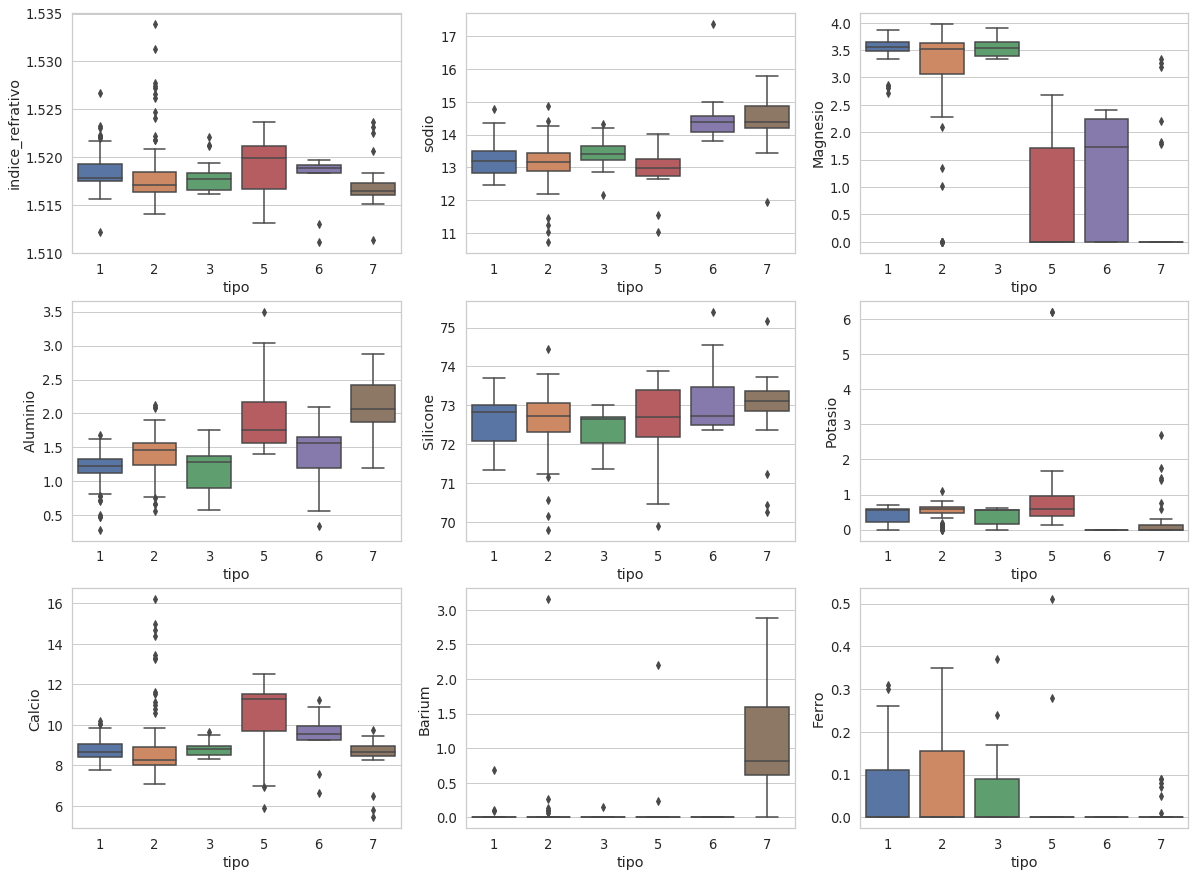

In [23]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='tipo', y='indice_refrativo', data=df)
plt.subplot(3, 3, 2)
sns.boxplot(x='tipo', y='sodio', data=df)
plt.subplot(3, 3, 3)
sns.boxplot(x='tipo', y='Magnesio', data=df)
plt.subplot(3, 3, 4)
sns.boxplot(x='tipo', y='Aluminio', data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='tipo', y='Silicone', data=df)
plt.subplot(3, 3, 6)
sns.boxplot(x='tipo', y='Potasio', data=df)
plt.subplot(3, 3, 7)
sns.boxplot(x='tipo', y='Calcio', data=df)
plt.subplot(3, 3, 8)
sns.boxplot(x='tipo', y='Barium', data=df)
plt.subplot(3, 3, 9)
sns.boxplot(x='tipo', y='Ferro', data=df)
plt.show()


                            P1    P2    P3    P4    P5   P6    P7   P8   P9
Variancia por Componente  3.01  1.66  0.68  0.65  0.21  0.1  0.01  0.0  0.0


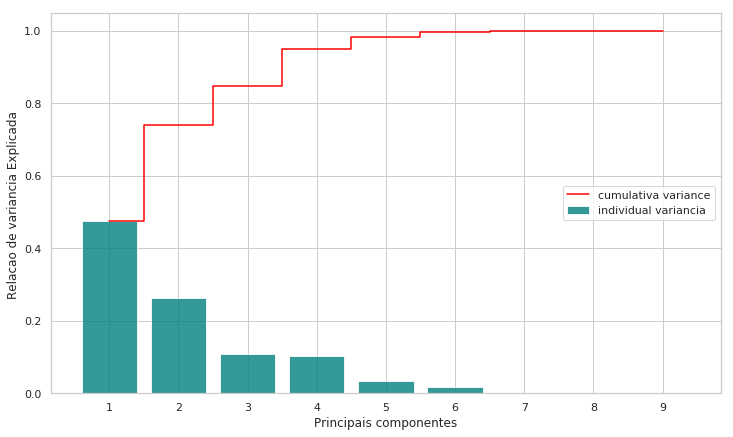

In [89]:
# Performing PCA
X = df[['indice_refrativo','sodio','Magnesio','Aluminio','Silicone','Potasio','Calcio','Barium','Ferro']]
pca = PCA(random_state = 1)
pca.fit(X)
variancia_expl = pca.explained_variance_ratio_
cum_var_expl = np.cumsum(variancia_expl)
variancia_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Variancia por Componente"])
print(variancia_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_expl)+1), variancia_expl, align= 'center', label= 'individual variancia', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_expl)+1), cum_var_expl, where = 'mid' , label= 'cumulativa variance', color='red')
plt.ylabel('Relacao de variancia Explicada ')
plt.xlabel('Principais componentes')
plt.xticks(np.arange(1,len(variancia_expl)+1,1))
plt.legend(loc='center right')
plt.show()


In [92]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X)

x = X_reduced
y = df['tipo'].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=25)

print(np.unique(y_train))
print(np.unique(y_test))


[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [93]:

# modelo = MultinomialNB()
# modelo.fit(X_train,y_train)


#Random Forest

classificador = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

classificador.fit(X_train,y_train)
classificador.score(X_test,y_test)



#Gaussi
gausiNb = GaussianNB()

gausiNb.fit(X_train,y_train)
gausiNb.score(X_test,y_test)


adaBoost =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

adaBoost.fit(X_train,y_train)
adaBoost.score(X_test,y_test) 

0.609375

In [94]:
#Algoritmo SVC

svm = SVC()
svm.fit(X_train,y_train)
y_predict  = svm.predict(X_test)

metrica_svm = metrics.accuracy_score(y_predict,y_test)


#algoritmo Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)

metrica_dctree = metrics.accuracy_score(y_predict, y_test)



#algoritmo Random Forest
rand_for = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=50, random_state=1)
rand_for.fit(X_train, y_train)
y_predict = rand_for.predict(X_test)
metric_random = metrics.accuracy_score(y_predict, y_test)


#Adaboost
adaBoost =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

adaBoost.fit(X_train,y_train)
adaBoost.score(X_test,y_test) 
metric_ada = metrics.accuracy_score(y_predict, y_test)



pd.DataFrame([['Support Vector Machine', metrica_svm],
                             ['Decision Tree', metrica_dctree], ['Random Forest', metric_random],['AdaBoost',metric_ada]],
                                 columns=['Model', 'Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.734375
1,Decision Tree,0.656250
2,Random Forest,0.765625
3,AdaBoost,0.765625


Text(201.86,0.5,'predicted label')

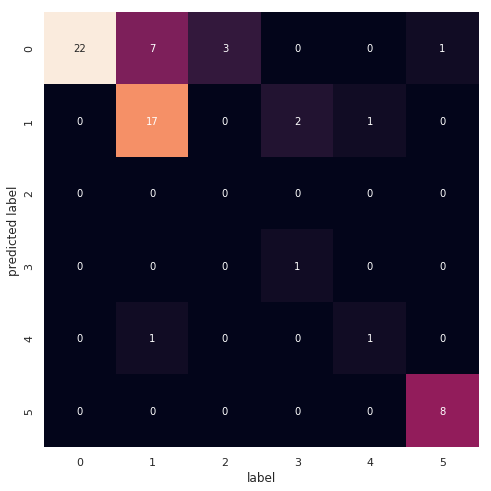

In [95]:
matriz_confusion = confusion_matrix(y_test,y_predict)
plt.subplots(figsize=(12, 8))
sns.heatmap(matriz_confusion.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('label')
plt.ylabel('predicted label')

In [96]:
print(confusion_matrix(y_test,classificador.predict(X_test)))
print(confusion_matrix(y_test,gausiNb.predict(X_test)))
print(confusion_matrix(y_test,adaBoost.predict(X_test)))


[[21  1  0  0  0  0]
 [ 6 19  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 1  1  0  0  0  1]
 [ 1  1  0  0  0  0]
 [ 1  0  0  0  0  8]]
[[20  1  1  0  0  0]
 [18  5  0  1  1  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  8]]
[[17  4  1  0  0  0]
 [10 13  0  1  1  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  2  0]
 [ 1  0  0  0  3  5]]


In [98]:
print(classification_report(y_test,y_predict))


             precision    recall  f1-score   support

          1       0.67      1.00      0.80        22
          2       0.85      0.68      0.76        25
          3       0.00      0.00      0.00         3
          5       1.00      0.33      0.50         3
          6       0.50      0.50      0.50         2
          7       1.00      0.89      0.94         9

avg / total       0.76      0.77      0.74        64

